# __Assisted Practice: Configuring Neural Network and Activation Function__
- Configuring a neural network involves setting various parameters and architectural choices to define the structure and behavior of the network.
Let's understand how to configure neural network in Python.

- An activation function determines the output of a neuron based on the weighted sum of its inputs, introducing non-linearity and enabling complex modeling in neural networks.
Let's understand how to build a simple neural network in Python, considering the activation function as tanh.

Let's understand how to build a perceptron-based classification model.

## Steps to be followed:
1. Import the required libraries
2. Initialize the weights
3. Update the weights
4. Initialize the think function and neural network
5. Train the neural network

### Step 1: Import the required libraries

- Import the necessary modules for numerical computations and define functions for exponential calculations, array operations, random number generation, and matrix multiplication.

In [1]:
import numpy as np
from numpy import exp, array, random, dot
import matplotlib.pyplot as plt

### Step 2: Initialize the weights

- Define a class with the name __NeuralNetwork__.
- Seed the random number generator so it generates the same numbers every time the program runs.
- Assign random weights to a 3X1 matrix, with values in the range __-1__ to __1__ and a mean of __0__.
- Use the __tanh__ function to describe an S-shaped curve.



### Step 3: Update the weights
- Train the neural network through a process of trial and error.
- Adjust the synaptic weights each time.
- Pass the training set through a neural network (a single neuron).
-  Calculate the error (the difference between the desired and predicted outputs).
- Adjust the weights.




In [2]:
class NeuralNetwork:
    def __init__(self, n_inputs: int = 3, seed: int | None = 2):
        if seed is not None:
            np.random.seed(seed)
        self.synaptic_weights = 2 * np.random.random((n_inputs, 1)) - 1
        self.losses = []  # will be filled by train()

    def _tanh(self, x):
        return np.tanh(x)

    def _tanh_derivative(self, activated_output):
        # derivative given activated output a = tanh(z) -> 1 - a^2
        return 1 - activated_output**2

    def think(self, inputs):
        X = np.atleast_2d(inputs)
        return self._tanh(X @ self.synaptic_weights)

    def train(self, X, y, epochs: int = 200, lr: float = 0.1, plot: bool = True):
        """
        Train the model and (optionally) plot the MSE loss curve.

        X: (n_samples, n_features)
        y: (n_samples, 1)
        """
        X = np.atleast_2d(X)
        y = np.atleast_2d(y)
        if y.shape[1] != 1:
            raise ValueError("y must have shape (n_samples, 1)")

        self.losses = []

        for _ in range(epochs):
            out = self.think(X)                         # forward
            err = y - out                               # error
            self.losses.append(np.mean(err**2))         # track MSE
            # gradient step
            self.synaptic_weights += lr * (X.T @ (err * self._tanh_derivative(out)))

        if plot:
            plt.figure(figsize=(6,4))
            plt.plot(range(epochs), self.losses, label="MSE Loss")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.title("Training Loss")
            plt.legend()
            plt.grid(True)
            plt.show()

        return self.losses  # handy if you want to inspect or test

> NOTE: We use the `class` object in this example to:
- Encapsulate the state of parameters, no need to store them or pass them around, they belong to the parent class
- Group related behavior such as initialization, forward pass, and backward pass
- Reusability, multiple networks can be used from one class, just tweak the __init__ method

### Step 4: Initialize the think function and neural network
- The __think__ function calculates the dot product between an array of inputs and the neural network's synaptic weights. It then applies the hyperbolic tangent activation function, __tanh__, to the result and returns the output.
- The main code block creates an instance of the __NeuralNetwork__ class and prints the initial random values of the synaptic weights.
- The **training_set_inputs** variable represents the input data for training the neural network.
- The training set input is a 2D array where each row corresponds to a set of input values.
- The **training_set_outputs** variable represents the corresponding output values for the training set.
- The training set output is a 2D array where each row corresponds to the expected output for the corresponding input set.

In [3]:
if __name__ == "__main__":
    # Create an instance of the NeuralNetwork class
    neural_network = NeuralNetwork()

    # Print the initial random synaptic weights
    print("Random starting synaptic weights:")
    print(neural_network.synaptic_weights)

    # Define the training set inputs and outputs
    training_set_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = np.array([[0, 1, 1, 0]]).T

Random starting synaptic weights:
[[-0.1280102 ]
 [-0.94814754]
 [ 0.09932496]]


**Observations:**
- The random starting synaptic weights are initialized with three values represented as a 2D array.
- Each value in the array corresponds to the synaptic weight connecting the input neurons to the single output neuron of the neural network.
- The values of the synaptic weights are randomly generated (given a seed to reproduce).



### Step 5: Train the neural network
- Train the neural network using training sets.
- Perform training sets __100__ times and make small adjustments each time.
- Test the neural network with a new situation.

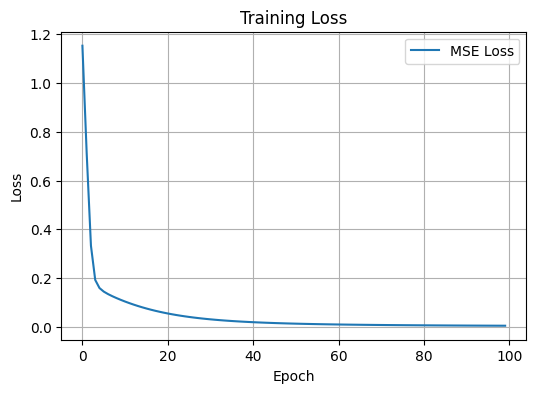

New synaptic weights after training:
[[ 1.48054446]
 [-0.01548013]
 [ 0.02767068]]
Considering new situation [1, 0, 0] -> ?:
[[0.90156995]]


In [4]:
    # Train the neural network with the training set
    neural_network.train(training_set_inputs, training_set_outputs, 100)

    # Print the new synaptic weights after training
    print("New synaptic weights after training:")
    print(neural_network.synaptic_weights)

    # Test the neural network with a new situation
    print("Considering new situation [1, 0, 0] -> ?:")
    print(neural_network.think(np.array([1, 0, 0])))

**Observations:**

- After training, the synaptic weights of the neural network are updated.
- The updated synaptic weights are approximately $5.39440666$, $-0.1947217$, and $-0.34310257$.
- The neural network is then provided with the new inputs of $1$, $0$, and $0$.
- The predicted output by the neural network for these inputs is approximately $0.99995$.
- The output represents the result of passing the inputs through the neural network after training, indicating the network's prediction or response.
- The plot shows a rapid loss drop to near zero, then a flat line